In [1]:
import torch
import pandas as pd
import numpy as np
from IPython.display import display

# Runtimes LLM Locales

Los runtimes de LLM locales son herramientas que permiten ejecutar LLMs directamente en dispositivos de consumo general. Estas herramientas ofrecen mayor privacidad, funcionamiento offline y, en muchos casos, menor costo de operación.


Nosotros vamos a ver 2 opciones basadas en la misma libreria (llama.cpp) que son ollama o lm studio.

## Tamaño

Estos runtimes necesitan modelos con diferentes caracteristicas, la primera es el peso o numero de parametros del modelo. No hay una manera estandard de categorizarlos, pero es comun en comunidades de llm locales separarlos por el hardware donde pueden correr.

- **1B - 7B**: Pueden correr en una sola tarjeta de video sin tanta compresion.
- **10B - 20B**: Pueden correr en 2 tarjetas de video de consumo general sin tanta compresion.
- **30B+**: Necesitas hardware especializado como A100 para poder correrlos sin compresion.

## Cuantizacion

La cuantización es el proceso de reducir la precisión numérica de los parámetros del modelo para hacerlos más eficientes.

La elección entre modelos y cuantizaciones depende del equilibrio que busques entre:

- Calidad de respuestas  
- Velocidad de inferencia
- Uso de memoria
- Recursos disponibles

Por ejemplo, un Mistral 7B en cuantización INT4 podría funcionar en una laptop estándar, mientras que un Llama 70B en FP16 requeriría una GPU de alta gama con mucha VRAM.


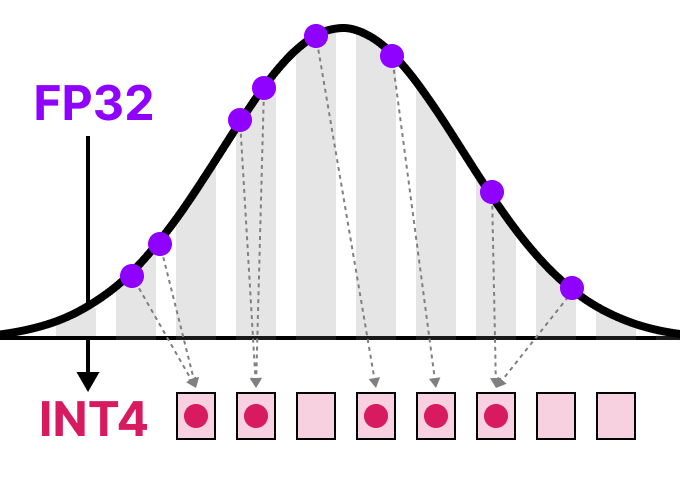


In [2]:
quantizaciones = [
    {
        "Cuantización": "FP32 (Full Precision)",
        "Tipo PyTorch": "torch.float32",
        "Tipo Numpy": "np.float32",
        "Bytes por elemento": np.dtype(np.float32).itemsize,
        "Bits por elemento": np.dtype(np.float32).itemsize * 8,
        "Rango aproximado": "±1.4e-45 a ±3.4e38",
        "Caso de uso típico": "Entrenamiento estándar"
    },
    {
        "Cuantización": "FP16 (Half Precision)",
        "Tipo PyTorch": "torch.float16",
        "Tipo Numpy": "np.float16",
        "Bytes por elemento": np.dtype(np.float16).itemsize,
        "Bits por elemento": np.dtype(np.float16).itemsize * 8,
        "Rango aproximado": "±6.1e-5 a ±65504",
        "Caso de uso típico": "Inferencia y entrenamiento con pérdida mínima"
    },
    {
        "Cuantización": "BF16 (Brain Float)",
        "Tipo PyTorch": "torch.bfloat16",
        "Tipo Numpy": "No estándar en NumPy",
        "Bytes por elemento": 2,
        "Bits por elemento": 16,
        "Rango aproximado": "±1.4e-45 a ±3.4e38 (mismo rango que FP32 con menos precisión)",
        "Caso de uso típico": "Entrenamiento eficiente en hardware compatible (TPUs, nuevas GPUs)"
    },
    {
        "Cuantización": "INT8 (8-bit Integer)",
        "Tipo PyTorch": "torch.int8",
        "Tipo Numpy": "np.int8",
        "Bytes por elemento": np.dtype(np.int8).itemsize,
        "Bits por elemento": np.dtype(np.int8).itemsize * 8,
        "Rango aproximado": "-128 a 127",
        "Caso de uso típico": "Inferencia con buen balance rendimiento/calidad"
    },
    {
        "Cuantización": "UINT8 (8-bit Unsigned)",
        "Tipo PyTorch": "torch.uint8",
        "Tipo Numpy": "np.uint8",
        "Bytes por elemento": np.dtype(np.uint8).itemsize,
        "Bits por elemento": np.dtype(np.uint8).itemsize * 8,
        "Rango aproximado": "0 a 255",
        "Caso de uso típico": "Inferencia y almacenamiento eficiente de tensores no negativos"
    }
]

df = pd.DataFrame(quantizaciones)
df_estilos = df.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'padding': '8px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#f2f2f2'),
              ('color', 'black'),
              ('font-weight', 'bold'),
              ('border', '1px solid black'),
              ('padding', '8px'),
              ('text-align', 'left')]
}])

html = df_estilos.to_html()
df

,Cuantización,Tipo PyTorch,Tipo Numpy,Bytes por elemento,Bits por elemento,Rango aproximado,Caso de uso típico
0,FP32 (Full Precision),torch.float32,np.float32,4,32,±1.4e-45 a ±3.4e38,Entrenamiento estándar
1,FP16 (Half Precision),torch.float16,np.float16,2,16,±6.1e-5 a ±65504,Inferencia y entrenamiento con pérdida mínima
2,BF16 (Brain Float),torch.bfloat16,No estándar en NumPy,2,16,±1.4e-45 a ±3.4e38 (mismo rango que FP32 con m...,Entrenamiento eficiente en hardware compatible...
3,INT8 (8-bit Integer),torch.int8,np.int8,1,8,-128 a 127,Inferencia con buen balance rendimiento/calidad
4,UINT8 (8-bit Unsigned),torch.uint8,np.uint8,1,8,0 a 255,Inferencia y almacenamiento eficiente de tenso...


## LM Studio
[Descargar LM Studio](https://lmstudio.ai/)


### Modelos
- bartowski/Llama-3.2-1B-Instruct-GGUF
- unsloth/Llama-3.2-1B-Instruct-GGUF
- lmstudio-community/gemma-3-1b-it-GGUF
- unsloth/DeepSeek-R1-Distill-Llama-8B-GGUF

Formato:

{Autor}/{Modelo}-{Peso}-{Tarea:Opcional}-{Contenedor:Opcional}


## Ollama

[Descargar ollama](https://ollama.com/)



```shell
ollama run llama3.2
```


Algunos modelos disponibles:

| Model              | Parameters | Size  | Download                         |
| ------------------ | ---------- | ----- | -------------------------------- |
| Gemma 3            | 1B         | 815MB | `ollama run gemma3:1b`           |
| Gemma 3            | 4B         | 3.3GB | `ollama run gemma3`              |
| Gemma 3            | 12B        | 8.1GB | `ollama run gemma3:12b`          |
| Gemma 3            | 27B        | 17GB  | `ollama run gemma3:27b`          |
| QwQ                | 32B        | 20GB  | `ollama run qwq`                 |
| DeepSeek-R1        | 7B         | 4.7GB | `ollama run deepseek-r1`         |
| DeepSeek-R1        | 671B       | 404GB | `ollama run deepseek-r1:671b`    |
| Llama 4            | 109B       | 67GB  | `ollama run llama4:scout`        |
| Llama 4            | 400B       | 245GB | `ollama run llama4:maverick`     |
| Llama 3.3          | 70B        | 43GB  | `ollama run llama3.3`            |
| Llama 3.2          | 3B         | 2.0GB | `ollama run llama3.2`            |
| Llama 3.2          | 1B         | 1.3GB | `ollama run llama3.2:1b`         |
| Llama 3.2 Vision   | 11B        | 7.9GB | `ollama run llama3.2-vision`     |
| Llama 3.2 Vision   | 90B        | 55GB  | `ollama run llama3.2-vision:90b` |
| Llama 3.1          | 8B         | 4.7GB | `ollama run llama3.1`            |
| Llama 3.1          | 405B       | 231GB | `ollama run llama3.1:405b`       |
| Phi 4              | 14B        | 9.1GB | `ollama run phi4`                |
| Phi 4 Mini         | 3.8B       | 2.5GB | `ollama run phi4-mini`           |
| Mistral            | 7B         | 4.1GB | `ollama run mistral`             |
| Moondream 2        | 1.4B       | 829MB | `ollama run moondream`           |
| Neural Chat        | 7B         | 4.1GB | `ollama run neural-chat`         |
| Starling           | 7B         | 4.1GB | `ollama run starling-lm`         |
| Code Llama         | 7B         | 3.8GB | `ollama run codellama`           |
| Llama 2 Uncensored | 7B         | 3.8GB | `ollama run llama2-uncensored`   |
| LLaVA              | 7B         | 4.5GB | `ollama run llava`               |
| Granite-3.3         | 8B         | 4.9GB | `ollama run granite3.3`          |



